<a href="https://colab.research.google.com/github/zwt4pb/ignore/blob/main/day1_hospital_readmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files
import seaborn as sns
uploaded = files.upload()


Saving FY_2024_Hospital_Readmissions_Reduction_Program_Hospital (1).csv to FY_2024_Hospital_Readmissions_Reduction_Program_Hospital (1) (1).csv


In [4]:
file = "/content/FY_2024_Hospital_Readmissions_Reduction_Program_Hospital (1).csv"
data = pd.read_csv(file)
data.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8916,3.5325,3.9618,Too Few to Report,7/1/2019,6/30/2022
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,NaN,1.1003,23.1263,21.0184,149,7/1/2019,6/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,NaN,0.9332,12.9044,13.8283,32,7/1/2019,6/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,NaN,0.9871,17.0529,17.2762,68,7/1/2019,6/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,NaN,0.9517,9.8131,10.3112,11,7/1/2019,6/30/2022


In [5]:
data['Number of Discharges'].fillna(data['Number of Discharges'].median(), inplace=True)

<ipython-input-5-5eff756c1ad0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of Discharges'].fillna(data['Number of Discharges'].median(), inplace=True)


In [6]:
data['Number of Readmissions'] = pd.to_numeric(data['Number of Readmissions'], errors='coerce')
readmissions_by_diagnosis = data.groupby('Measure Name')['Number of Readmissions'].sum()
readmissions_by_diagnosis_sorted = readmissions_by_diagnosis.sort_values(ascending=False)
top_5_diagnoses = readmissions_by_diagnosis_sorted.head(5)
for diagnosis, readmissions in top_5_diagnoses.items():
    print(f"{diagnosis}: {int(readmissions):,} readmissions.")


READM-30-HF-HRRP: 148,213 readmissions.
READM-30-PN-HRRP: 101,169 readmissions.
READM-30-COPD-HRRP: 39,275 readmissions.
READM-30-AMI-HRRP: 33,269 readmissions.
READM-30-HIP-KNEE-HRRP: 6,721 readmissions.


reads Heart Failure, Pneuomnia, Chronic Obstructive Pulmonary Disease Care, Heart Attack Care, and Total Hip/Knee Arthroplasty

research questions: How do the excess readmission ratio and the predicted readmission rate influence the actual number of readmissions across healthcare facilities in various states?

How can the excess readmission ratio and predicted readmission rate be used as indicators of the actual number of readmissions across healthcare facilities in different states?



In [7]:
data.describe()
data[['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Number of Readmissions']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Excess Readmission Ratio    12077 non-null  float64
 1   Predicted Readmission Rate  12077 non-null  float64
 2   Number of Readmissions      7890 non-null   float64
dtypes: float64(3)
memory usage: 440.1 KB


<Axes: >

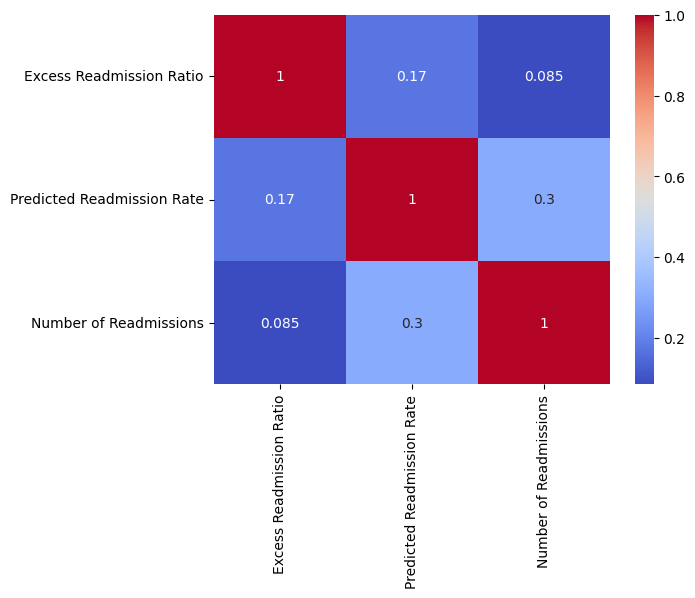

In [8]:
correlation_matrix = data[['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Number of Readmissions']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [12]:
import plotly.express as px

columns_needed = ['State', 'Measure Name', 'Number of Readmissions']
data_cleaned = data[columns_needed]

data_cleaned['Number of Readmissions'] = pd.to_numeric(data_cleaned['Number of Readmissions'], errors='coerce')

state_agg = data_cleaned.groupby(['State', 'Measure Name'], as_index=False).sum()

state_agg['Rank'] = state_agg.groupby('State')['Number of Readmissions'].rank(method='max', ascending=False)
prevalent_cause = state_agg[state_agg['Rank'] == 1]

map_data = prevalent_cause[['State', 'Measure Name', 'Number of Readmissions']]
map_data.rename(columns={
    'Measure Name': 'Most Prevalent Cause',
    'Number of Readmissions': 'Total Readmissions'
}, inplace=True)

state_codes = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
map_data['State Name'] = map_data['State'].map(state_codes)

regions = {
    'Midwest': [
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
        'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'
    ],
    'West': [
        'Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana',
        'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'
    ],
    'Southeast': [
        'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
        'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia',
        'West Virginia'
    ],
    'Southwest': [
        'Arizona', 'New Mexico', 'Oklahoma', 'Texas'
    ],
    'Northeast': [
        'Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts',
        'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania',
        'Rhode Island', 'Vermont', 'District of Columbia'
    ]
}

def assign_region(state_name):
    for region, states in regions.items():
        if state_name in states:
            return region
    return 'Unknown'

map_data['Region'] = map_data['State Name'].apply(assign_region)

fig = px.choropleth(
    map_data,
    locations='State',
    locationmode="USA-states",
    color='Most Prevalent Cause',
    hover_name='State Name',
    hover_data={
        'Total Readmissions': True,
        'Most Prevalent Cause': True,
        'Region': True,
        'State': False,
    },
    scope="usa",
    title="Most Prevalent Causes of Readmission by State with Regions",
    labels={'Most Prevalent Cause': 'Prevalent Cause'}
)

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))

print(fig.show())



<ipython-input-12-70cf2c871add>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-70cf2c871add>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



None


In [10]:
columns_needed = ['Facility Name', 'State', 'Measure Name', 'Predicted Readmission Rate', 'Expected Readmission Rate']
scatter_data = data[columns_needed].dropna()

scatter_data['Predicted Readmission Rate'] = pd.to_numeric(scatter_data['Predicted Readmission Rate'], errors='coerce')
scatter_data['Expected Readmission Rate'] = pd.to_numeric(scatter_data['Expected Readmission Rate'], errors='coerce')

state_codes = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
scatter_data['State Name'] = scatter_data['State'].map(state_codes)

regions = {
    'Midwest': [
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
        'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'
    ],
    'West': [
        'Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana',
        'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'
    ],
    'Southeast': [
        'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
        'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia',
        'West Virginia'
    ],
    'Southwest': [
        'Arizona', 'New Mexico', 'Oklahoma', 'Texas'
    ],
    'Northeast': [
        'Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts',
        'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania',
        'Rhode Island', 'Vermont', 'District of Columbia'
    ]
}

def assign_region(state_name):
    for region, states in regions.items():
        if state_name in states:
            return region
    return 'Unknown'

scatter_data['Region'] = scatter_data['State Name'].apply(assign_region)

measure_name_mapping = {
    'READM-30-HF-HRRP': 'Heart Failure',
    'READM-30-PN-HRRP': 'Pneumonia',
    'READM-30-COPD-HRRP': 'Chronic Obstructive Pulmonary Disease',
    'READM-30-AMI-HRRP': 'Acute Myocardial Infarction',
    'READM-30-HIP-KNEE-HRRP': 'Hip and Knee Replacements',
    'READM-30-CABG-HRRP': 'Coronary Artery Bypass Graft'
}

scatter_data['Measure Name'] = scatter_data['Measure Name'].replace(measure_name_mapping)

def create_region_scatter(region_name):
    region_data = scatter_data[scatter_data['Region'] == region_name]

    if region_data.empty:
        print(f"No data available for region: {region_name}")
        return

    fig = px.scatter(
        region_data,
        x='Predicted Readmission Rate',
        y='Expected Readmission Rate',
        color='Measure Name',
        hover_name='Facility Name',
        hover_data={
            'State Name': True,
            'Measure Name': True,
            'Predicted Readmission Rate': True,
            'Expected Readmission Rate': True,
        },
        title=f"{region_name} - Predicted vs. Expected Readmission Rates",
        labels={
            'Predicted Readmission Rate': 'Predicted Rate (%)',
            'Expected Readmission Rate': 'Expected Rate (%)',
            'Measure Name': 'Condition'
        }
    )
    fig.update_traces(marker=dict(size=10, opacity=0.7))
    fig.update_layout(
        xaxis_title='Predicted Readmission Rate (%)',
        yaxis_title='Expected Readmission Rate (%)',
        legend_title='Condition',
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(255,255,255,1)'
    )
    fig.show()

for region in regions.keys():
    create_region_scatter(region)